<a href="https://colab.research.google.com/github/Ranga12891/ML-algorithm-to-find-User-have-purchased-product-using-social-Networking-ads/blob/main/ML_Alg_to_Determine_whether_the_User_have_Purchased_or_not_using_Social_Networking_Ads_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Preprocessing**

**Importing Dataset**

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Assignment_11to16/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


There is no Null in the dataset & All the datatypes are correct but Only Gender is in Object. So we need to encode the data

**Data Encoding**

In [37]:
# Encodeing Gender Column using One Hot Encoding
# Label encoding is not used because the ML alg may give weightage based on 1 & 0 to Male & Female
Gen = df.Gender.unique()
Male = [1 if i == 'Male' else 0 for i in df['Gender'].values ]
Female = [1 if i == 'Female' else 0 for i in df['Gender'].values ]
df['Male'] = Male
df['Female'] = Female

In [38]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Male,Female
0,15624510,Male,19,19000,0,1,0
1,15810944,Male,35,20000,0,1,0
2,15668575,Female,26,43000,0,0,1
3,15603246,Female,27,57000,0,0,1
4,15804002,Male,19,76000,0,1,0
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0,1
396,15706071,Male,51,23000,1,1,0
397,15654296,Female,50,20000,1,0,1
398,15755018,Male,36,33000,0,1,0


User_ID is Unique Column SO it should be removed and Gender Column as well since Encoding is done

In [39]:
DF = df.drop(['User ID','Gender'],axis = 1)

In [40]:
DF.describe()

,Age,EstimatedSalary,Purchased,Male,Female
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000,0.510000
std,10.482877,34096.960282,0.479864,0.500526,0.500526
min,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000,1.000000
75%,46.000000,88000.000000,1.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000,1.000000


EDA

Text(0.5, 1.0, 'EstimatedSalary')

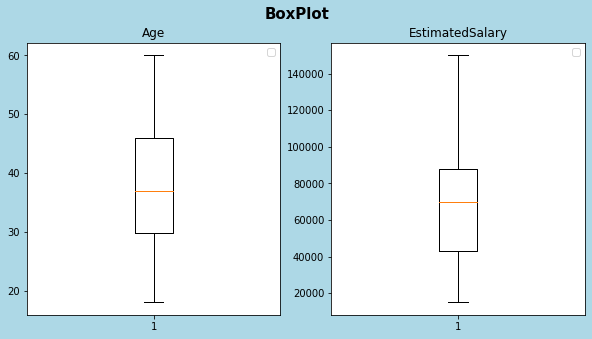

In [41]:
# Boxplot to see any Outliers
m,n,k = 0,0,0
fig,ax = plt.subplots(1,2,figsize=(10, 5), facecolor='lightblue',frameon=True)
fig.suptitle('BoxPlot',fontsize = 15,fontweight ='bold')

ax[0].boxplot(DF['Age'])
ax[0].legend()
ax[0].set_title('Age')

ax[1].boxplot(DF['EstimatedSalary'])
ax[1].legend()
ax[1].set_title('EstimatedSalary')


From the Box Plot it is clear that No Outliers Found and Data is clean

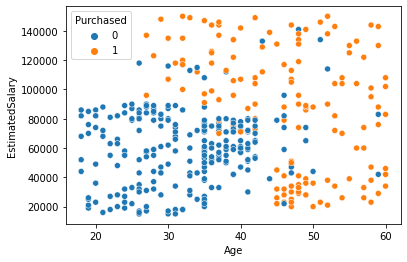

In [42]:
sns.scatterplot(x = DF.Age,y = DF.EstimatedSalary,data = DF, hue = 'Purchased')

From the Above the plot it clear that the Age and Estimated Salary has Positive linear Correlation. So we can use Linear Regression.

In [43]:
DF.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Male', 'Female'], dtype='object')

In [44]:
X = DF.drop('Purchased',axis = 1).values
Y = DF.Purchased.values

In [45]:
Ftrs = DF.drop('Purchased',axis = 1).columns
Ftrs

Index(['Age', 'EstimatedSalary', 'Male', 'Female'], dtype='object')

Spltting & Scaling the data

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Now the Dataset is ready to Apply ML Algorith.

#**ML Algorithms**

In [47]:
# Importing Packages from SciKit Learn
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.metrics import roc_auc_score,plot_roc_curve
Evaluation_Scores = {'ML Model': [],'Score':[]} # To Store Evaluation Scores for all the ML Models.

**KNN Algorithm**

In [48]:
from sklearn.neighbors import KNeighborsClassifier 
CV_Scores = []
#Hyper Parameter Tuning
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i) #it will initialise the model with @neighbours as k 
  knn.fit(x_train, y_train) # train the model
  CV_Scores.append(round(np.mean(cross_val_score(knn, x_train, y_train, cv=10)),3))
K = CV_Scores.index(max(CV_Scores))+ 1
print("Optimal K Value : ",K,"with CV Score - ",max(CV_Scores))
print(CV_Scores)


Optimal K Value :  5 with CV Score -  0.912
[0.872, 0.859, 0.897, 0.884, 0.912, 0.9, 0.909, 0.912, 0.912, 0.909]


In [49]:
knn = KNeighborsClassifier(n_neighbors=K) #it will initialise the model with @neighbours as k 
knn.fit(x_train, y_train)
KNN_pred = knn.predict(x_test)

#KNN_Score = round(knn.score(x_test,y_test),3)
KNN_Score = round(roc_auc_score(y_test, KNN_pred),3)
KNN_Score

0.932

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


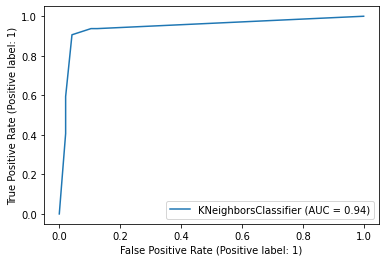

In [50]:
plot_roc_curve(knn, x_test, y_test)

In [51]:
Evaluation_Scores['ML Model'].append('KNN')
Evaluation_Scores['Score'].append(KNN_Score)
Evaluation_Scores

{'ML Model': ['KNN'], 'Score': [0.932]}

**Logistic Regression**

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=2)
lr.fit(x_train,y_train)
LR_Pred = lr.predict(x_test)
LR_Score = round(roc_auc_score(y_test, LR_Pred),3)
LR_Score

0.781

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


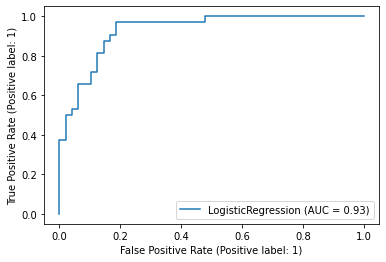

In [53]:
plot_roc_curve(lr, x_test, y_test)

In [54]:
Evaluation_Scores['ML Model'].append('Linear Regression')
Evaluation_Scores['Score'].append(LR_Score)
Evaluation_Scores

{'ML Model': ['KNN', 'Linear Regression'], 'Score': [0.932, 0.781]}

**Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier
# Hyperparametr tuning to get optimal depth
CV_Scores = []

for depth in range(1, 11):
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train,y_train) # the model is trained
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  CV_Scores.append(round(np.mean(valAccuracy),3))
D = CV_Scores.index(max(CV_Scores))+ 1
print("Optimal Depth Value : ",D,"with CV Score - ",max(CV_Scores))
print(CV_Scores)


Optimal Depth Value :  2 with CV Score -  0.897
[0.825, 0.897, 0.884, 0.891, 0.875, 0.869, 0.862, 0.869, 0.872, 0.859]


In [56]:
dt = DecisionTreeClassifier(max_depth=D) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
dt.fit(x_train,y_train) # the model is trained
DT_Pred = dt.predict(x_test)
DT_Score = round(roc_auc_score(y_test, DT_Pred),3)
DT_Score

0.943

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


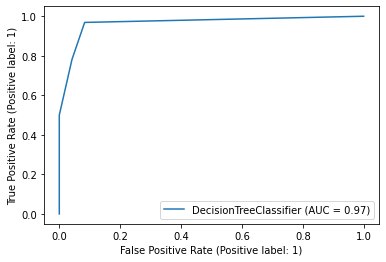

In [57]:
plot_roc_curve(dt, x_test, y_test)

In [58]:
Evaluation_Scores['ML Model'].append('Decision Tree')
Evaluation_Scores['Score'].append(DT_Score)
Evaluation_Scores

{'ML Model': ['KNN', 'Linear Regression', 'Decision Tree'],
 'Score': [0.932, 0.781, 0.943]}

[Text(0.5, 0.8333333333333334, 'X[0] <= 0.455\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(0.25, 0.5, 'X[1] <= 0.594\ngini = 0.265\nsamples = 229\nvalue = [193, 36]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.07\nsamples = 193\nvalue = [186, 7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.313\nsamples = 36\nvalue = [7, 29]'),
 Text(0.75, 0.5, 'X[0] <= 0.841\ngini = 0.29\nsamples = 91\nvalue = [16, 75]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.231\nsamples = 75\nvalue = [10, 65]')]

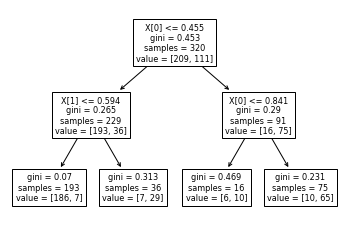

In [59]:
# Visulising Decision Tree
from sklearn import tree
tree.plot_tree(dt)

**Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
rf.fit(x_train,y_train)
RF_Pred = dt.predict(x_test)
RF_Score = round(roc_auc_score(y_test, DT_Pred),3)
RF_Score

0.943

In [61]:
Evaluation_Scores['ML Model'].append('Random Forest')
Evaluation_Scores['Score'].append(RF_Score)
Evaluation_Scores

{'ML Model': ['KNN', 'Linear Regression', 'Decision Tree', 'Random Forest'],
 'Score': [0.932, 0.781, 0.943, 0.943]}

#**Model Comparsion**

In [62]:
Score_DF = pd.DataFrame(Evaluation_Scores)
Score_DF

,ML Model,Score
0,KNN,0.932
1,Linear Regression,0.781
2,Decision Tree,0.943
3,Random Forest,0.943


[Text(0.5, 1.0, 'AUROC Score Comparison')]

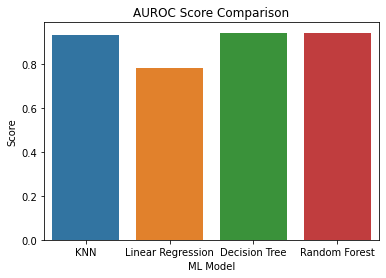

In [63]:
sns.barplot(data = Score_DF,x ='ML Model',y = 'Score',errwidth = 0 ).set(title='AUROC Score Comparison')


From the Above Plot it is clear that Best ML Model is **Decision Tree and Random Forest Algorithm** having same  Evaluation Score **0.943**

In [66]:
print ("The Best ML Model is **Decision Tree and Random Forest** with AUROC Score of **",max(Evaluation_Scores['Score']),"**")

The Best ML Model is **Decision Tree and Random Forest** with AUROC Score of ** 0.943 **
